In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('kyphosis.csv')

In [20]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


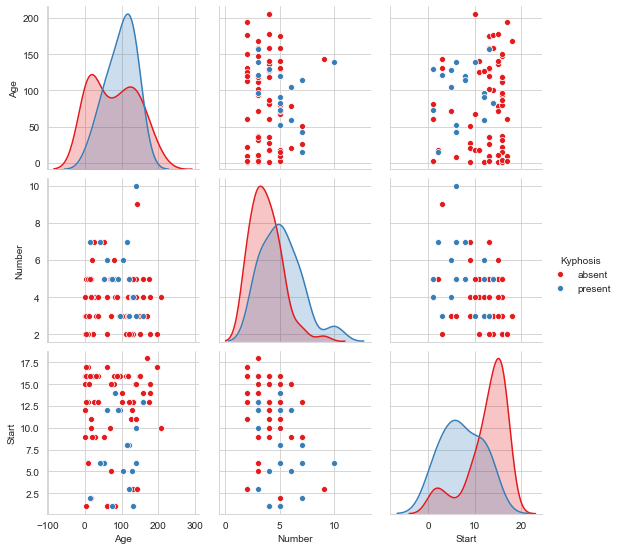

In [22]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Kyphosis', palette='Set1', diag_kind='auto')
# After operation, whether or not the kyphosis still present on a child

# Decision tree

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training model

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluate the model

In [41]:
predictions = dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[19  3]
 [ 2  1]]

              precision    recall  f1-score   support

      absent       0.90      0.86      0.88        22
     present       0.25      0.33      0.29         3

    accuracy                           0.80        25
   macro avg       0.58      0.60      0.58        25
weighted avg       0.83      0.80      0.81        25



In [52]:
X_test.head()

,Age,Number,Start
3,2,5,1
69,15,5,16
11,148,3,16
15,1,3,16
35,93,3,16


In [49]:
y_test.value_counts()

absent     22
present     3
Name: Kyphosis, dtype: int64

# Tree Visualization

In [32]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

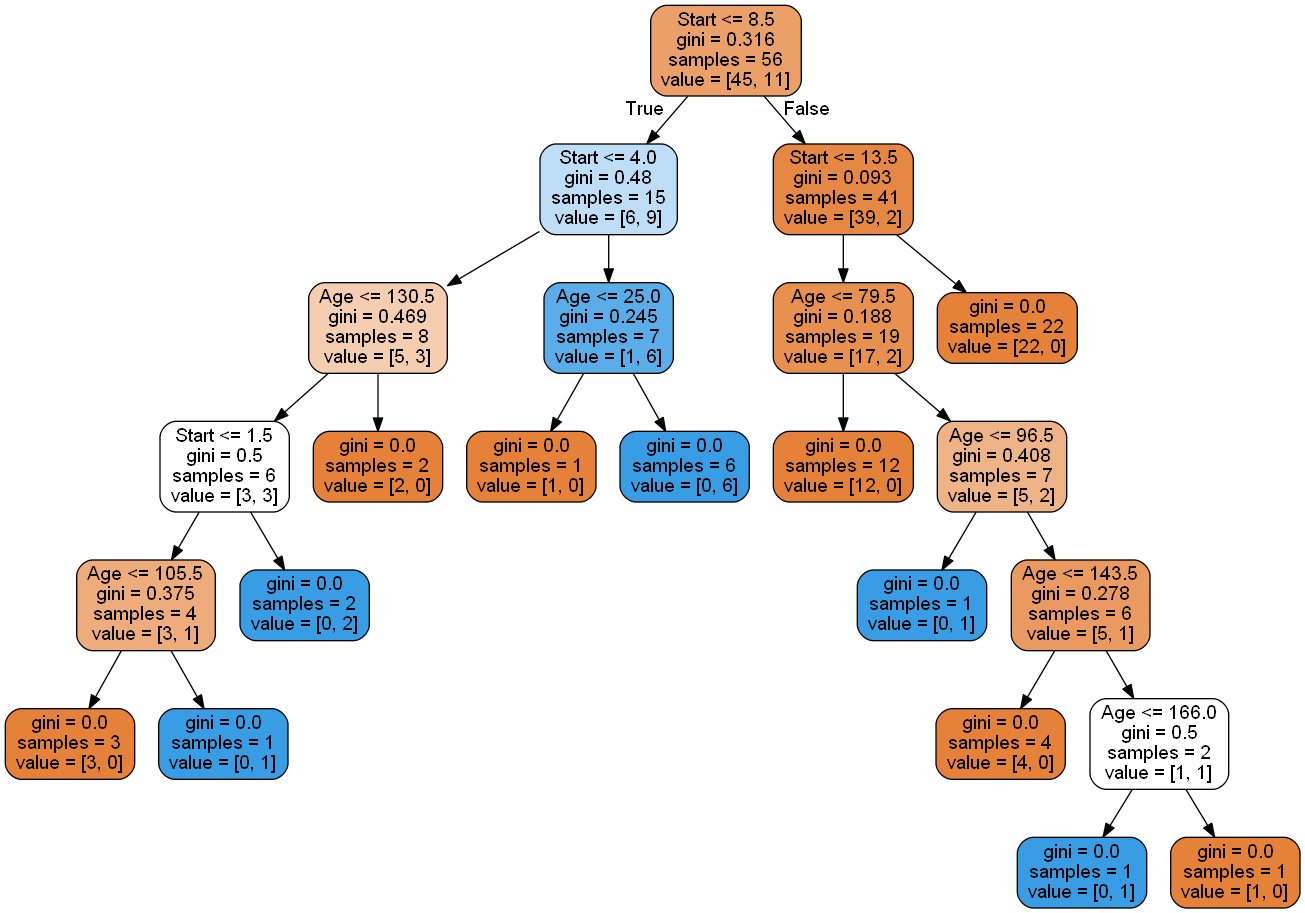

In [34]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=200)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test, rfc_pred))
print()
print(classification_report(y_test, rfc_pred))

[[21  1]
 [ 2  1]]

              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        22
     present       0.50      0.33      0.40         3

    accuracy                           0.88        25
   macro avg       0.71      0.64      0.67        25
weighted avg       0.86      0.88      0.87        25



In [58]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

- In general, the larger our dataset is, the better accuracy from random forest comparing to a single dicision tree
- The random forest accuracy didn't outshine much comparing to a single dicision tree in this kyphosis dataset since the dataset is not that much large.
- Notice that we have a lot more cases of it being absent vs present. So already our label in our dataset is unbalanced.

# WELL DONE !